C:\Users\corsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\corsi\AppData\Local\Temp\ipykernel_22328\3197167412.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].replace({True: 0, False: 1}, inplace=True)
C:\Users\corsi\AppD

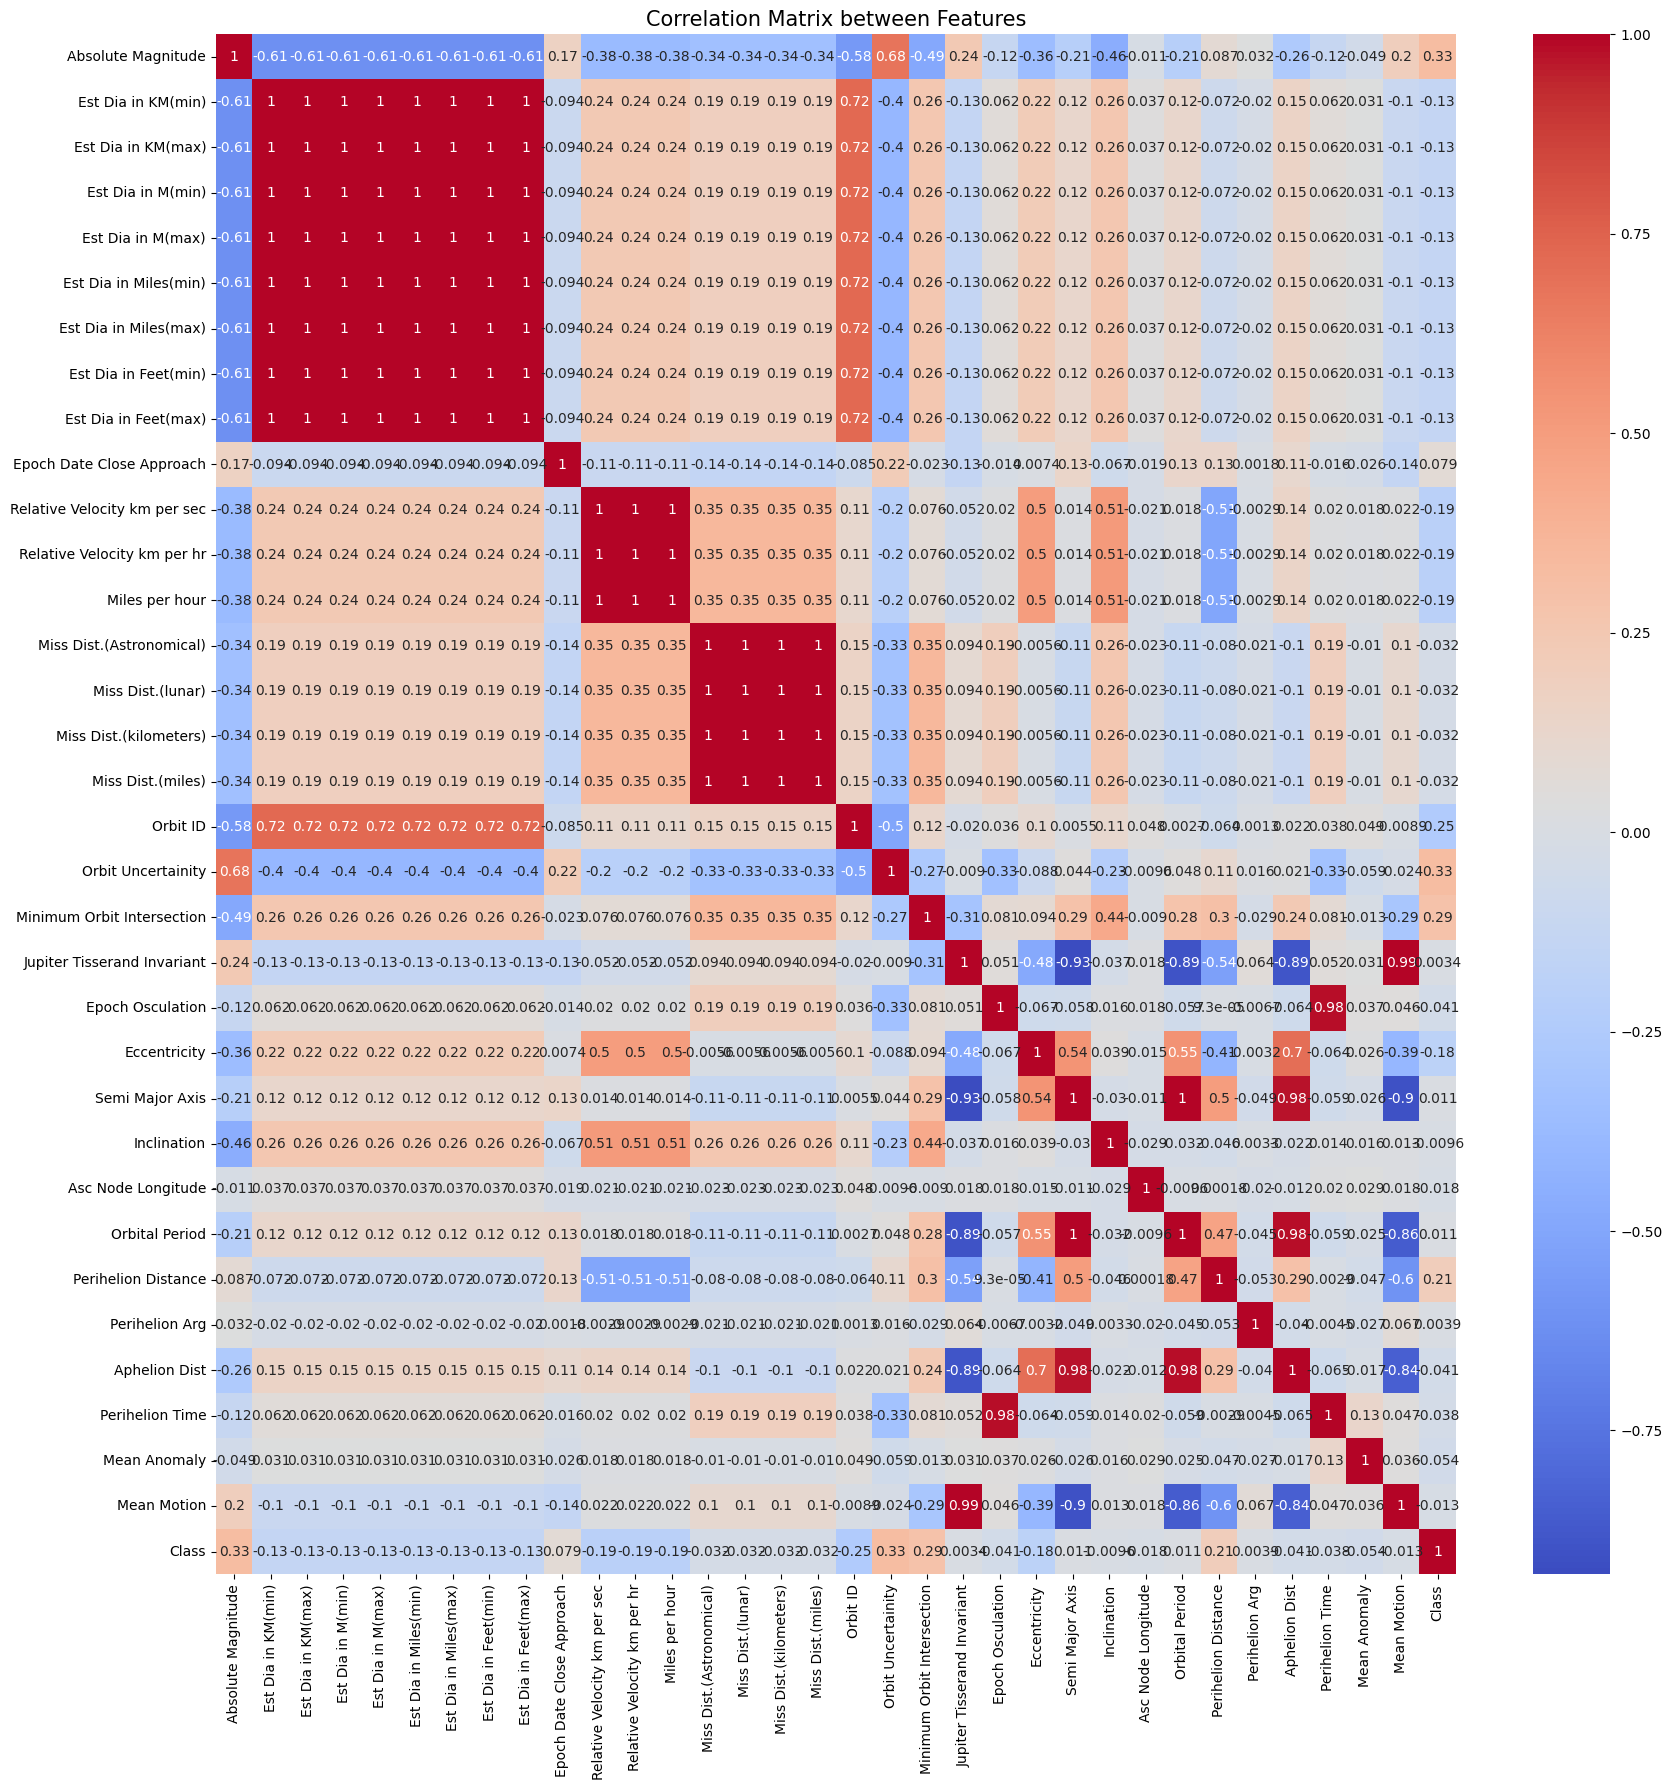

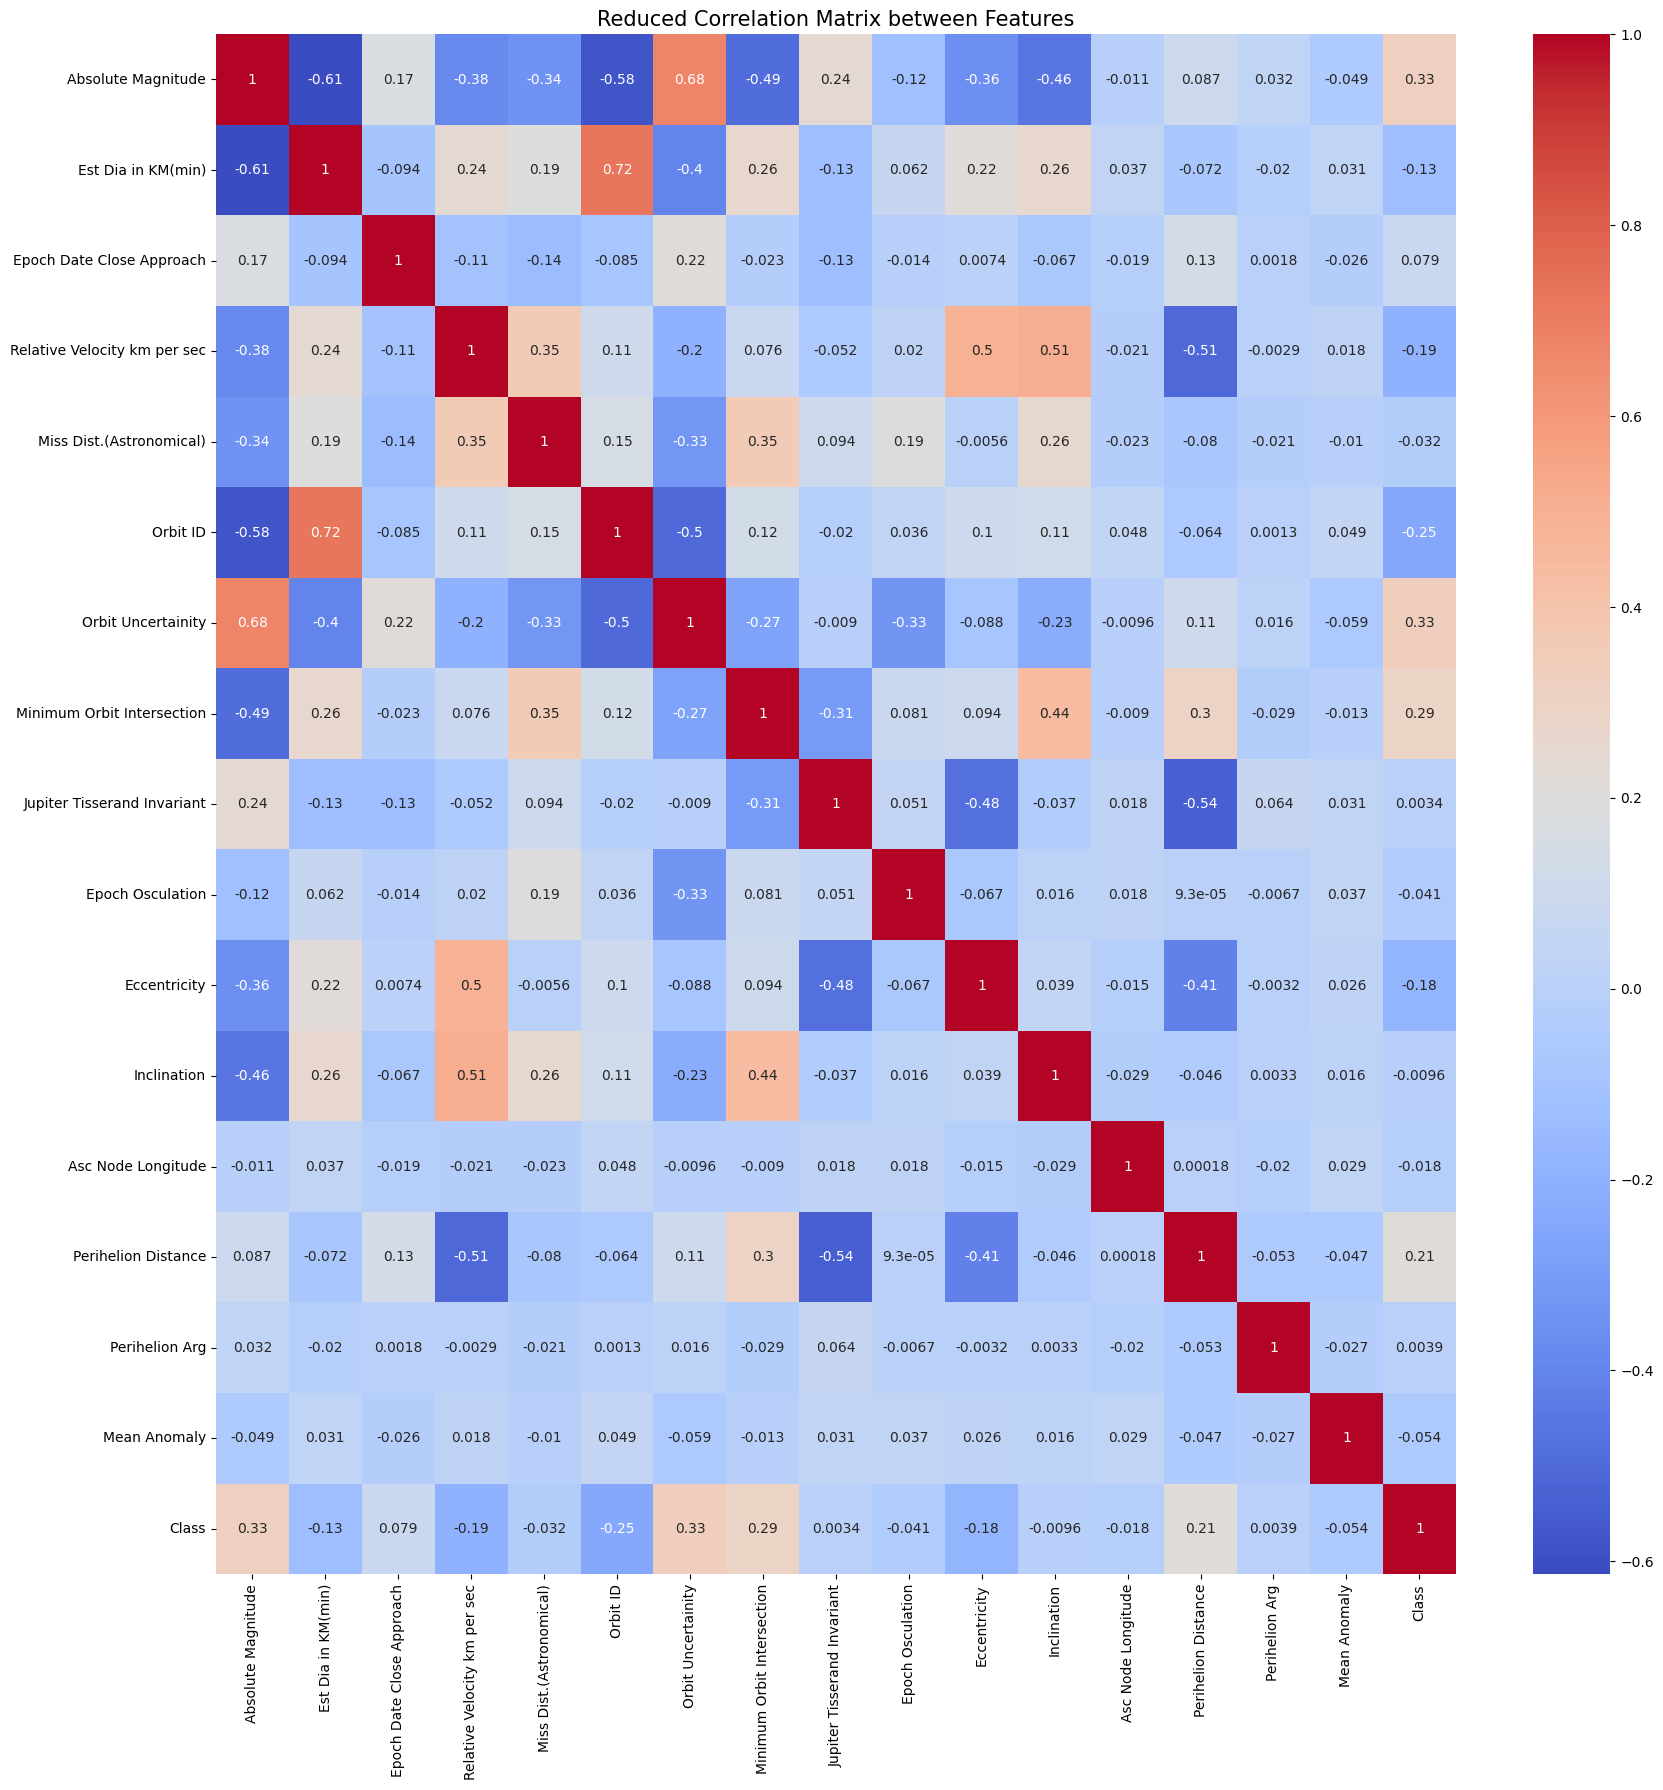

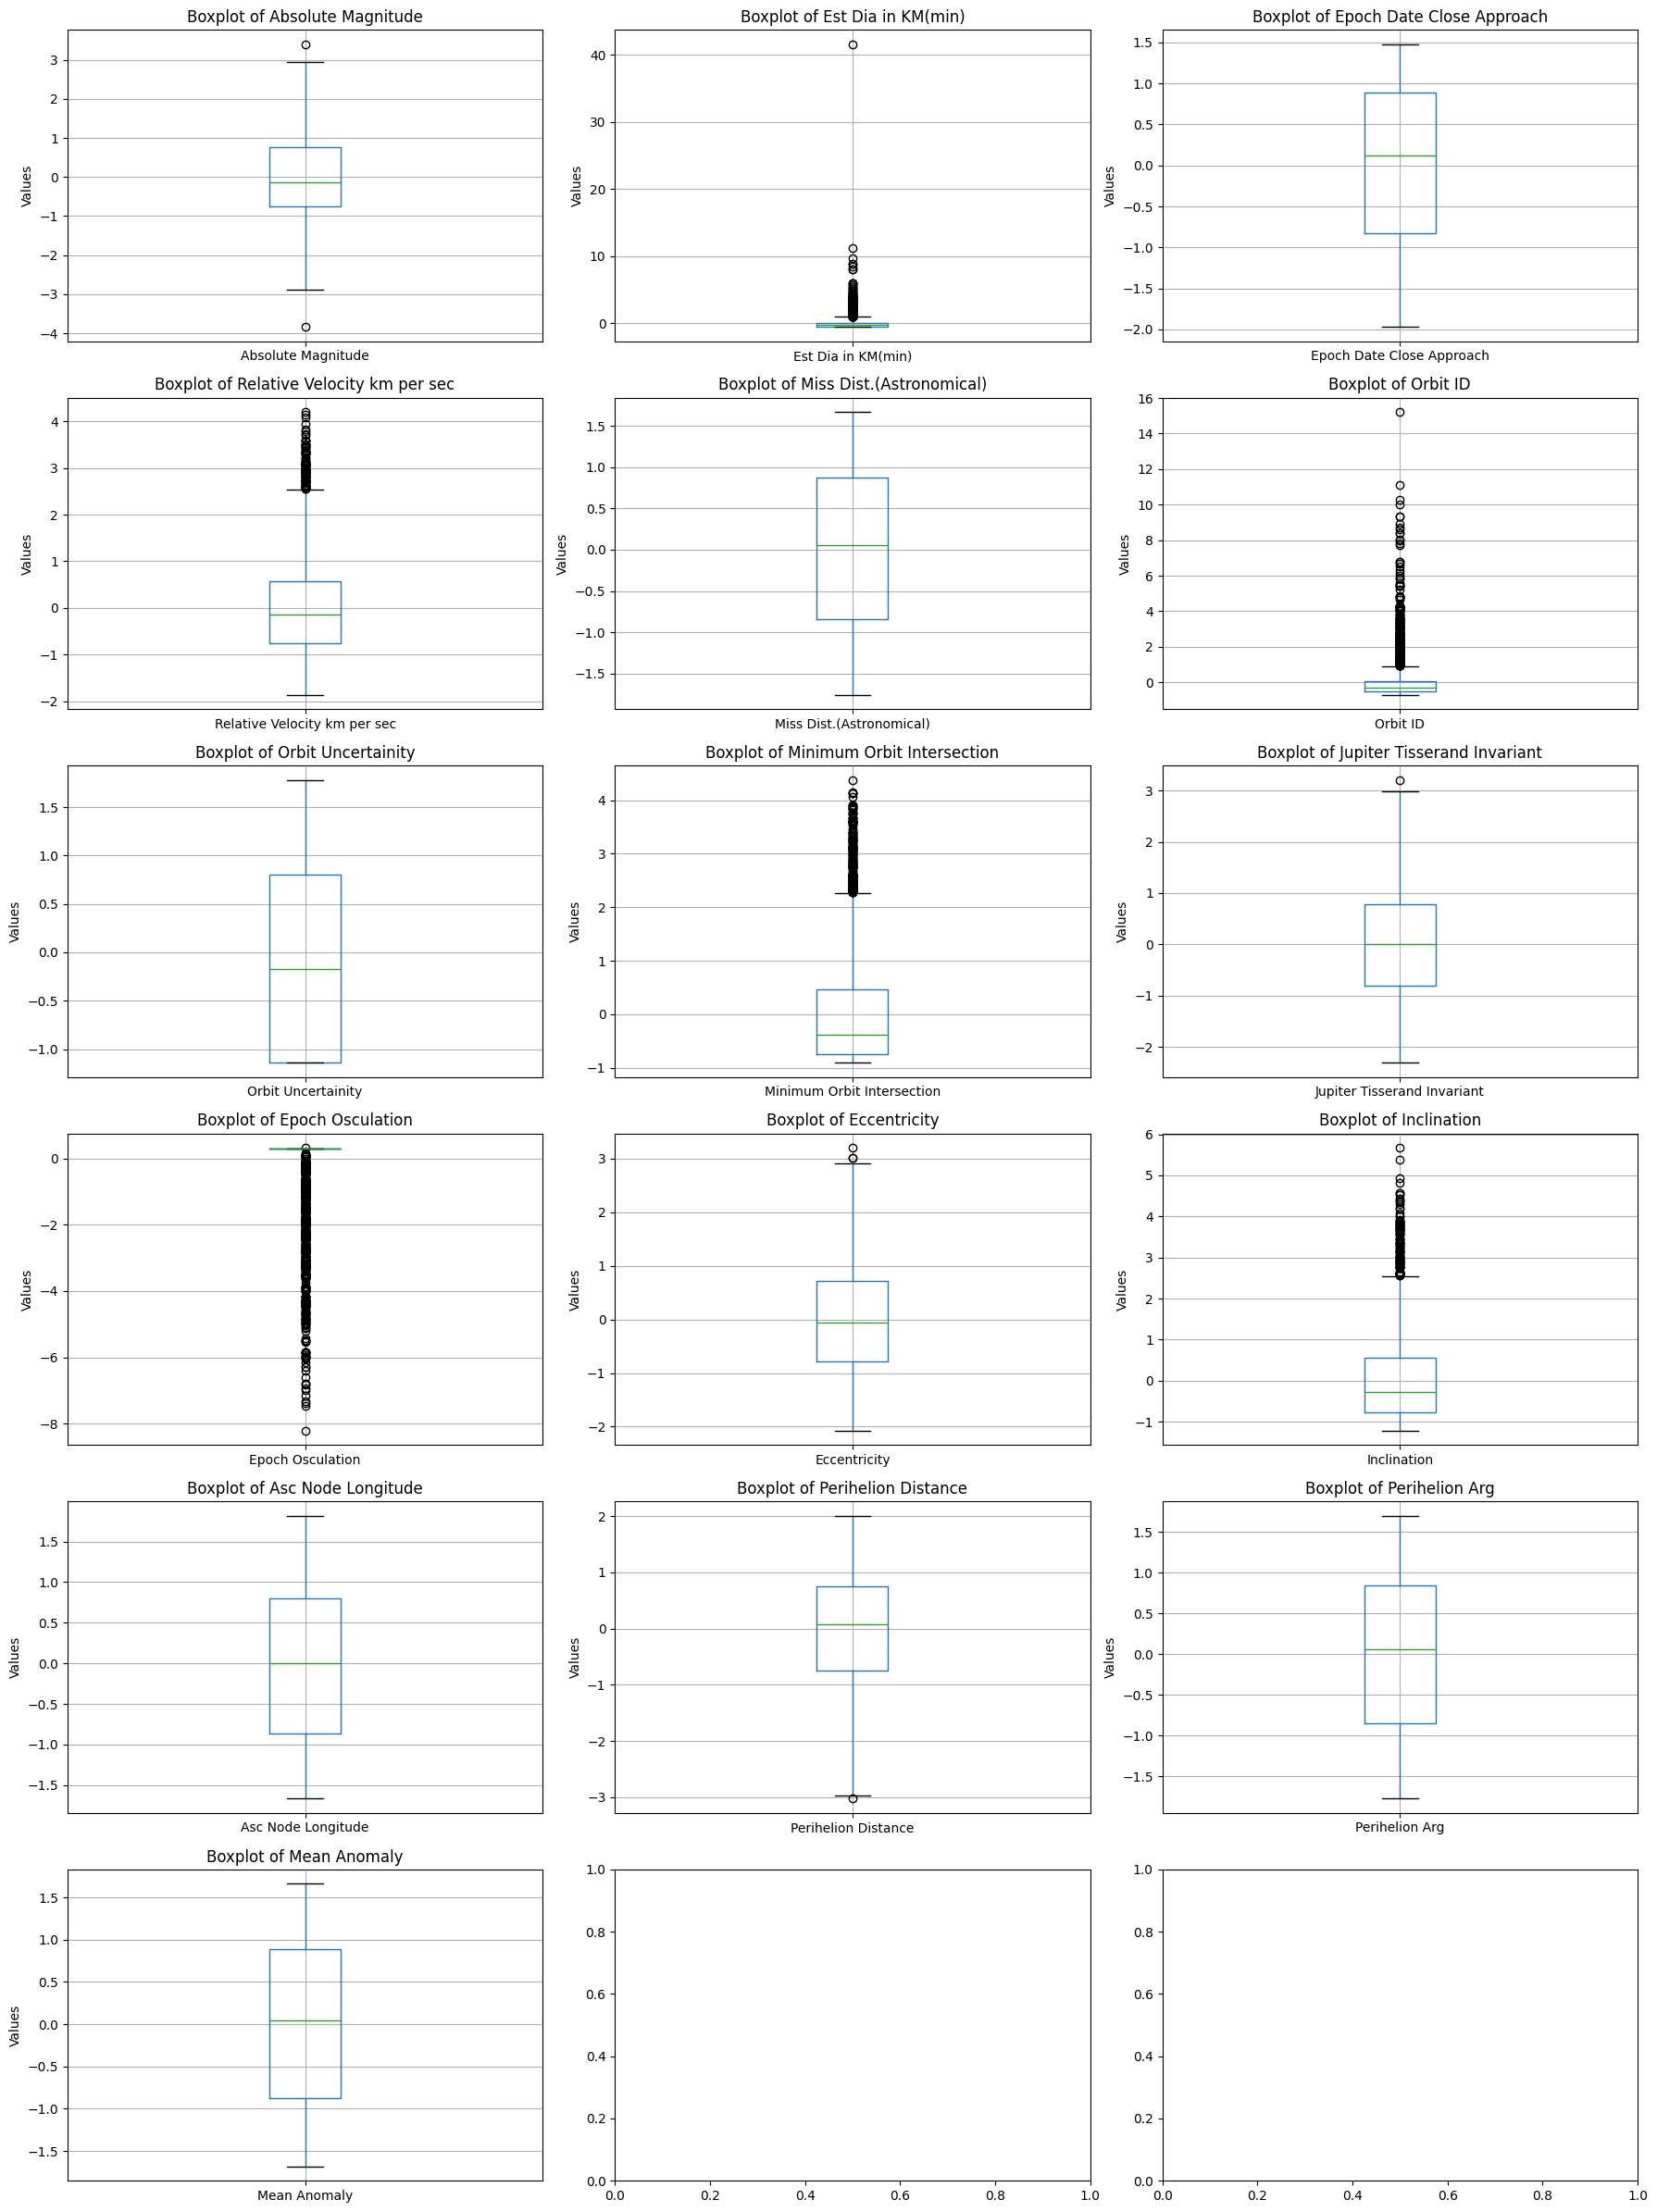

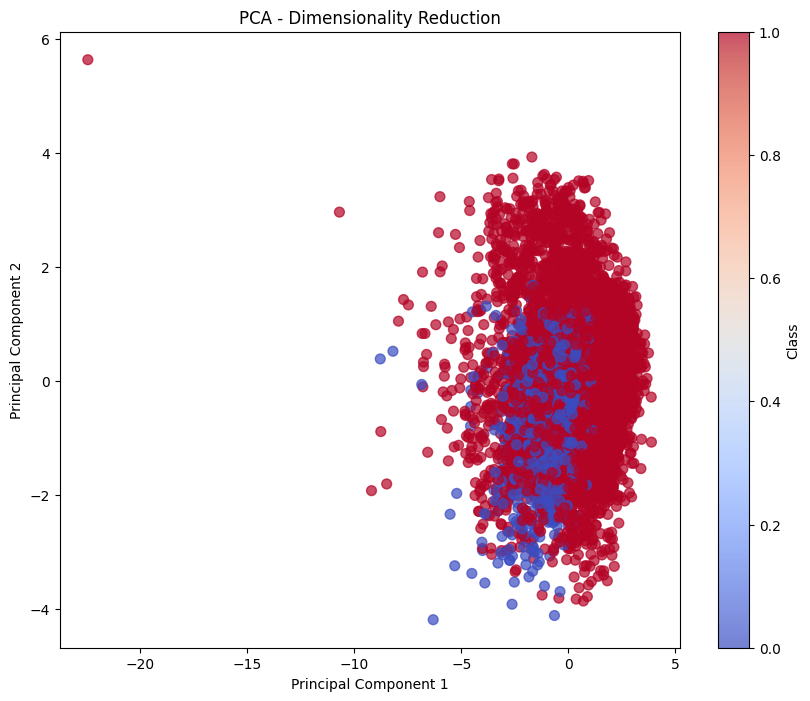

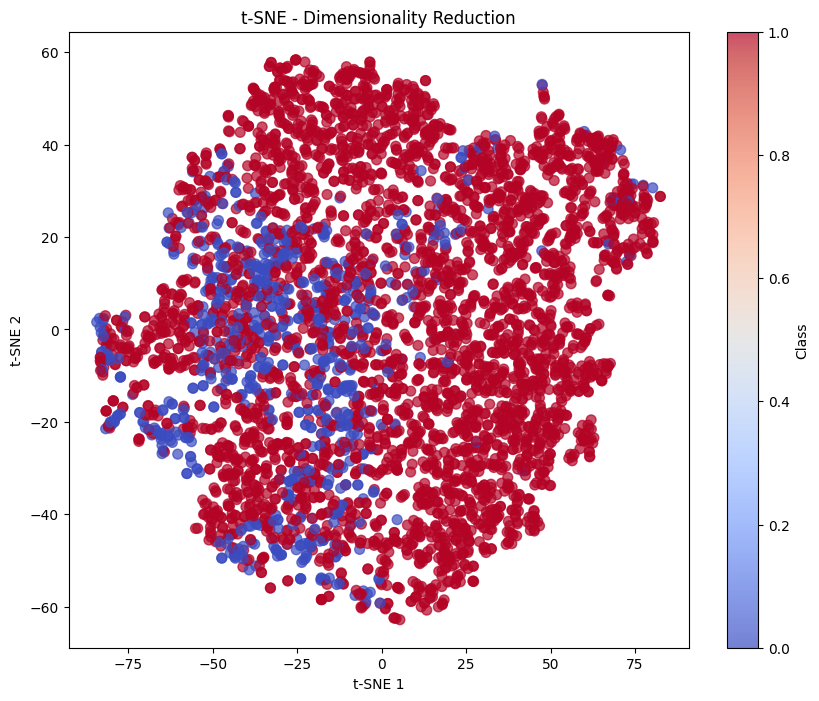

C:\Users\corsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


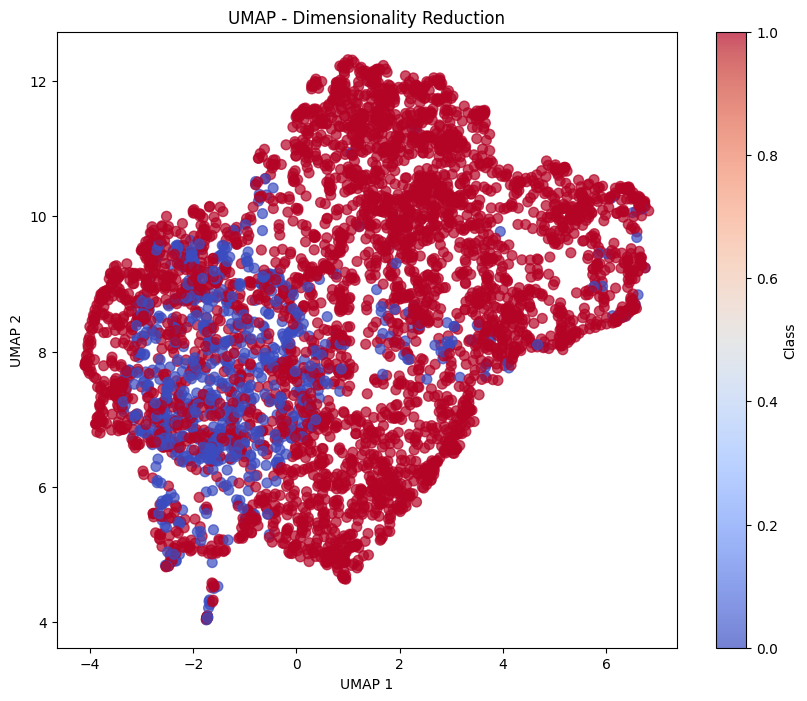

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("nasa.csv")

# 1. Preprocesamiento
# Eliminar columnas de tipo 'object' y aquellas irrelevantes
df.drop(['Name', 'Neo Reference ID', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1, inplace=True)

# Renombrar la etiqueta "Hazardous" como "Class" y reemplazar valores True/False con 0 y 1
df.rename(columns={'Hazardous': 'Class'}, inplace=True)
df['Class'].replace({True: 0, False: 1}, inplace=True)

# Estandarizar los datos (excepto la columna de clase)
features = df.drop(columns='Class')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Volver a juntar con la columna de clase
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Class'] = df['Class']

# 2. Análisis de correlación
# Calcular y mostrar la matriz de correlación
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Features', size=15)
plt.show()

# Eliminar características altamente correlacionadas (por encima de 0.9)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            col = correlation_matrix.columns[i]
            correlated_features.add(col)

df_scaled.drop(labels=correlated_features, axis=1, inplace=True)

# Visualizar nuevamente la matriz de correlación después de eliminar características
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Reduced Correlation Matrix between Features', size=15)
plt.show()

# 3. Análisis exploratorio - Distribuciones individuales
num_features = len(df_scaled.columns) - 1  # Excluyendo la columna 'Class'
num_rows = (num_features + 2) // 3  # Calcular filas necesarias
num_cols = min(num_features, 3)

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
for i, feature in enumerate(df_scaled.drop(columns='Class').columns):
    row = i // num_cols
    col = i % num_cols
    df_scaled[[feature]].boxplot(ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_ylabel('Values')
plt.tight_layout()
plt.show()

# 4. Análisis de reducción de dimensionalidad
# Método PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Método t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_result = tsne.fit_transform(df_scaled.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_scaled['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('t-SNE - Dimensionality Reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Método UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(df_scaled.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df_scaled['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('UMAP - Dimensionality Reduction')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
